# Übungsblatt 3

Lernziele:
- Clustering mit K-Means und Gaußscher Mischverteilung
- Einsatz von SciKit Learn



Schritt 1: Lesen Sie die Trainings-Daten aus 'data/2d_samples_4cl_train.csv' ein!

In [1]:
import pandas as pd
pData = pd.read_csv("2d_samples_4cl_train.csv", header=0)
pData.set_index("Label")
pData.head()

x1        x2 Label
0  25.5428   8.12002     A
1  28.7852  10.51880     A
2  31.1303   9.20584     B
3  31.1073   9.47408     B
4  31.2040   9.33927     B

Schritt 2: Berechnen Sie für die Muster die 4 Klassenmittelpunkte mit Hilfe des K-Means Algorithmus. Verwenden Sie hierbei das Modul SciKit Learn (sklearn)

In [2]:
from sklearn.cluster import KMeans
prediction = KMeans(n_clusters=4).fit_predict(pData.loc[:,["x1","x2"]])
pData['KMeansPred'] = prediction[:]
pData.head()

x1        x2 Label  KMeansPred
0  25.5428   8.12002     A           2
1  28.7852  10.51880     A           0
2  31.1303   9.20584     B           1
3  31.1073   9.47408     B           1
4  31.2040   9.33927     B           1

Schritt 3: Stellen Sie das Ergebnis des Clusterings in einem Scatterplot dar!

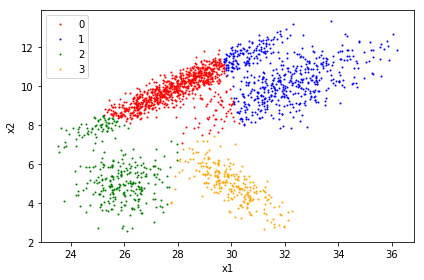

In [6]:
import matplotlib.pyplot as plt

colors = ['red','blue','green','orange']

for i in range(0,4):
    plt.scatter(pData.loc[pData.KMeansPred == i, 'x1'], pData.loc[pData.KMeansPred == i, 'x2'], color=colors[i], label=i, s=1)


plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Schritt 4: Führen Sie das Clustering mit Gaußscher Mischverteilung durch.

In [4]:
from sklearn.mixture import GaussianMixture

predGaussian = GaussianMixture(n_components=4,covariance_type='full').fit_predict(pData.loc[:,["x1","x2"]])
pData['predGaussian'] = predGaussian[:]
pData.head()

x1        x2 Label  KMeansPred  predGaussian
0  25.5428   8.12002     A           2             0
1  28.7852  10.51880     A           0             0
2  31.1303   9.20584     B           1             2
3  31.1073   9.47408     B           1             2
4  31.2040   9.33927     B           1             2

Schritt 5: Stellen Sie das Ergebnis des Clusterings in einem Scatterplot dar!

In [5]:
for i in range(0,4):
    plt.scatter(pData.loc[pData.predGaussian == i, 'x1'], pData.loc[pData.predGaussian == i, 'x2'], color=colors[i], label=i, s=1)


plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Schritt 6: Führen Sie die Schritte 4+5 mehrfach hintereinander auf. Was fällt auf? 